<a href="https://colab.research.google.com/github/younesA99/svm/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
TrainPd=pd.read_excel("Concrete_Data.xls")
#renaming all featurses
TrainPd.columns = ['cement','blastFurnace','flyAsh','water','superplasticizer','courseAggregate','fineaggregate','age','strength']

#Verification des valeur manquantes
TrainPd.isna().sum()

# Split the data into features and target
X=TrainPd.drop(["strength"],axis=1)
Y=TrainPd["strength"]
Names=list(X.columns.values)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state = 1)

#Normalisation des données
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit on training set only.
scaler.fit(X_train)
MinMaxScaler(copy=(), feature_range=(0,1))
# Apply transform to both the training set and the test set.
X_train_transformed = scaler.transform(X_train)
X_test_transoformed = scaler.transform(X_test)

# **SVM**

In [ ]:
#from sklearn.svm import SVR

# Définition du modèle SVM avec noyau linéaire
#svm_regressor = SVR(kernel='linear')

# Entraînement du modèle sur les données d'entraînement normalisées
#svm_regressor.fit(X_train_transformed, Y_train)





In [19]:
from sklearn.svm import SVR

# Définition du modèle SVR
svm_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Entraînement du modèle sur les données d'entraînement normalisées
svm_regressor.fit(X_train_transformed, Y_train)

# Prédiction sur l'ensemble de test
predictions = svm_regressor.predict(X_test_transoformed)


In [20]:
# Création d'un DataFrame avec les colonnes ID, Y_test et predictions
results_df = pd.DataFrame({'Y_test': Y_test.values, 'predictions': predictions})

# Affichage des cinq premières lignes du DataFrame
print(results_df.head())


      Y_test  predictions
0  21.911547    33.030019
1  19.932751    24.364934
2  36.438807    26.528958
3  11.957582    19.781249
4  39.844818    32.050227


In [4]:
predictions_df = pd.DataFrame({'Y_test': Y_test.values, 'predictions1': predictions})
predictions_df.head()


,Y_test,predictions1
0,21.911547,33.030019
1,19.932751,24.364934
2,36.438807,26.528958
3,11.957582,19.781249
4,39.844818,32.050227


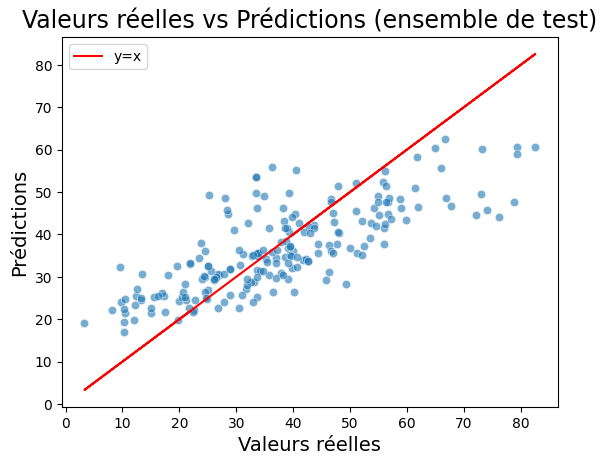

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création du nuage de points

sns.scatterplot( x=Y_test, y=predictions, alpha=0.6)

# Tracé de la droite y = x pour comparer
plt.plot(predictions_df['Y_test'], predictions_df['Y_test'], color='red', label='y=x')

plt.xlabel('Valeurs réelles', fontsize=14)
plt.ylabel('Prédictions', fontsize=14)
plt.title('Valeurs réelles vs Prédictions (ensemble de test)', fontsize=17)
plt.legend()
plt.show()


In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcul de l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(Y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# Calcul de l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(Y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Calcul de la racine de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calcul du coefficient de détermination R²
r2 = r2_score(Y_test, predictions)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 8.322624798531313
Mean Squared Error (MSE): 110.6392184667345
Root Mean Squared Error (RMSE): 10.51851788355824
R-squared (R²): 0.5756010720757347


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Définition des hyperparamètres à tester
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'epsilon': [0.1, 0.01, 0.001]
}

# Initialisation de la recherche par grille
grid_search = GridSearchCV(SVR(), param_grid, cv=5)

# Exécution de la recherche par grille sur les données d'entraînement
grid_search.fit(X_train_transformed, Y_train)

# Affichage des meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres trouvés : ", grid_search.best_params_)

# Utilisation du modèle avec les meilleurs paramètres sur les données de test
best_svm = grid_search.best_estimator_
predictions_optimise = best_svm.predict(X_test_transoformed)

# Calcul de l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(Y_test, predictions_optimise)
print("Mean Absolute Error (MAE) :", mae)

# Calcul de l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(Y_test, predictions_optimise)
print("Mean Squared Error (MSE) :", mse)

# Calcul de la racine de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) :", rmse)

# Calcul du coefficient de détermination R²
r2 = r2_score(Y_test, predictions_optimise)
print("R-squared (R²) :", r2)


Meilleurs hyperparamètres trouvés :  {'C': 100, 'epsilon': 0.1, 'kernel': 'rbf'}
Mean Absolute Error (MAE) : 4.784273437714155
Mean Squared Error (MSE) : 50.6110870602297
Root Mean Squared Error (RMSE) : 7.114146966448592
R-squared (R²) : 0.8058618689908656


In [8]:
# Création d'un DataFrame avec les colonnes ID, Y_test et predictions
results_df = pd.DataFrame({'Y_test': Y_test.values, 'predictions': predictions,'predictions_optimise': predictions_optimise})

# Affichage des cinq premières lignes du DataFrame
print(results_df.head())

      Y_test  predictions  predictions_optimise
0  21.911547    33.030019             26.513694
1  19.932751    24.364934             14.242797
2  36.438807    26.528958             19.401611
3  11.957582    19.781249             12.106151
4  39.844818    32.050227             31.627259


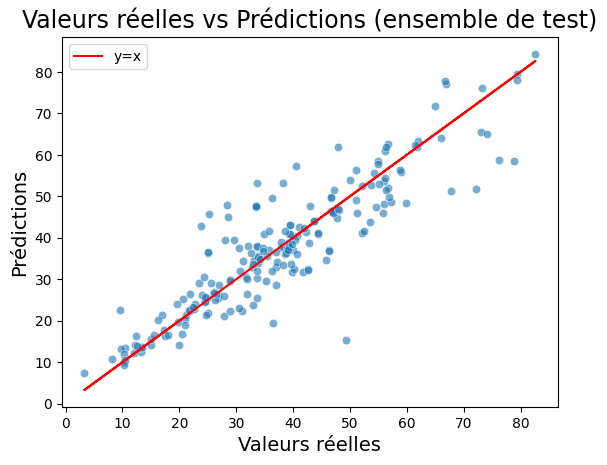

In [9]:
# Création du nuage de points

sns.scatterplot( x=Y_test, y=predictions_optimise, alpha=0.6)

# Tracé de la droite y = x pour comparer
plt.plot(predictions_df['Y_test'], predictions_df['Y_test'], color='red', label='y=x')

plt.xlabel('Valeurs réelles', fontsize=14)
plt.ylabel('Prédictions', fontsize=14)
plt.title('Valeurs réelles vs Prédictions (ensemble de test)', fontsize=17)
plt.legend()
plt.show()


In [10]:
# Récupérer les résultats de la recherche par grille
results = grid_search.cv_results_

# Créer une DataFrame à partir des résultats
results_df = pd.DataFrame(results)

# Sélectionner les colonnes pertinentes : 'param_C', 'param_kernel', 'param_gamma', 'param_epsilon', 'mean_test_score'
columns_to_keep = ['param_C', 'param_kernel', 'param_epsilon', 'mean_test_score']
results_df = results_df[columns_to_keep]

# Affichage de la matrice des combinaisons de paramètres et leurs valeurs R²
print(results_df)



   param_C param_kernel param_epsilon  mean_test_score
0      0.1       linear           0.1         0.136246
1      0.1          rbf           0.1         0.146935
2      0.1       linear          0.01         0.136215
3      0.1          rbf          0.01         0.146500
4      0.1       linear         0.001         0.136247
5      0.1          rbf         0.001         0.146524
6        1       linear           0.1         0.532870
7        1          rbf           0.1         0.578736
8        1       linear          0.01         0.532788
9        1          rbf          0.01         0.578214
10       1       linear         0.001         0.532784
11       1          rbf         0.001         0.578170
12      10       linear           0.1         0.608332
13      10          rbf           0.1         0.786114
14      10       linear          0.01         0.607299
15      10          rbf          0.01         0.786372
16      10       linear         0.001         0.607256
17      10

In [11]:
# Créer une table pivot avec les valeurs de C et R² pour chaque combinaison
pivot_table = results_df.pivot_table(values='mean_test_score', index=results_df.index, columns='param_C')

# Afficher le tableau
#print(pivot_table)

print(pivot_table.iloc[0:35])  # Affiche les lignes de l'indice 10 à l'indice 20 inclus
print(pivot_table.iloc[35:72])

param_C     0.1       1.0       10.0      100.0
0        0.136246       NaN       NaN       NaN
1        0.146935       NaN       NaN       NaN
2        0.136215       NaN       NaN       NaN
3        0.146500       NaN       NaN       NaN
4        0.136247       NaN       NaN       NaN
5        0.146524       NaN       NaN       NaN
6             NaN  0.532870       NaN       NaN
7             NaN  0.578736       NaN       NaN
8             NaN  0.532788       NaN       NaN
9             NaN  0.578214       NaN       NaN
10            NaN  0.532784       NaN       NaN
11            NaN  0.578170       NaN       NaN
12            NaN       NaN  0.608332       NaN
13            NaN       NaN  0.786114       NaN
14            NaN       NaN  0.607299       NaN
15            NaN       NaN  0.786372       NaN
16            NaN       NaN  0.607256       NaN
17            NaN       NaN  0.786393       NaN
18            NaN       NaN       NaN  0.577819
19            NaN       NaN       NaN  0

In [ ]:
#grid = GridSearchCV(estimator=SVR(),param_grid= param_grid, refit = True, verbose=2, cv=5 )
# May take a while!
#grid.fit(X_train,Y_train)

In [12]:
# Exécution de la recherche par grille sur les données d'entraînement
grid_search.fit(X_train_transformed, Y_train)

# Affichage de toutes les combinaisons testées et leurs scores correspondants
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Score moyen : {mean_score:.4f}, Paramètres : {params}")


Score moyen : 0.1362, Paramètres : {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}
Score moyen : 0.1469, Paramètres : {'C': 0.1, 'epsilon': 0.1, 'kernel': 'rbf'}
Score moyen : 0.1362, Paramètres : {'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}
Score moyen : 0.1465, Paramètres : {'C': 0.1, 'epsilon': 0.01, 'kernel': 'rbf'}
Score moyen : 0.1362, Paramètres : {'C': 0.1, 'epsilon': 0.001, 'kernel': 'linear'}
Score moyen : 0.1465, Paramètres : {'C': 0.1, 'epsilon': 0.001, 'kernel': 'rbf'}
Score moyen : 0.5329, Paramètres : {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}
Score moyen : 0.5787, Paramètres : {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
Score moyen : 0.5328, Paramètres : {'C': 1, 'epsilon': 0.01, 'kernel': 'linear'}
Score moyen : 0.5782, Paramètres : {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}
Score moyen : 0.5328, Paramètres : {'C': 1, 'epsilon': 0.001, 'kernel': 'linear'}
Score moyen : 0.5782, Paramètres : {'C': 1, 'epsilon': 0.001, 'kernel': 'rbf'}
Score moyen : 0.6083, Paramètres :

In [13]:
import pandas as pd

# Exécution de la recherche par grille sur les données d'entraînement
grid_search.fit(X_train_transformed, Y_train)

# Création d'un DataFrame Pandas à partir des résultats de la recherche par grille
results = pd.DataFrame(grid_search.cv_results_)

# Affichage des résultats sous forme de tableau
print(results[['params', 'mean_test_score']])


                                              params  mean_test_score
0     {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}         0.136246
1        {'C': 0.1, 'epsilon': 0.1, 'kernel': 'rbf'}         0.146935
2    {'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}         0.136215
3       {'C': 0.1, 'epsilon': 0.01, 'kernel': 'rbf'}         0.146500
4   {'C': 0.1, 'epsilon': 0.001, 'kernel': 'linear'}         0.136247
5      {'C': 0.1, 'epsilon': 0.001, 'kernel': 'rbf'}         0.146524
6       {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}         0.532870
7          {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}         0.578736
8      {'C': 1, 'epsilon': 0.01, 'kernel': 'linear'}         0.532788
9         {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}         0.578214
10    {'C': 1, 'epsilon': 0.001, 'kernel': 'linear'}         0.532784
11       {'C': 1, 'epsilon': 0.001, 'kernel': 'rbf'}         0.578170
12     {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}         0.608332
13        {'C': 10, 

# **XGBoost**

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb


# Réglage des hyperparamètres pour XGBoost
xgb_regressor = xgb.XGBRegressor()

# Paramètres à régler
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Recherche par grille pour trouver les meilleurs hyperparamètres
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5)
grid_search.fit(X_train_transformed, Y_train)

# Meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres trouvés :", best_params)

# Utilisation du modèle avec les meilleurs hyperparamètres
best_xgb = xgb.XGBRegressor(**best_params)
best_xgb.fit(X_train_transformed, Y_train)
predictions_xgb = best_xgb.predict(X_test_transoformed)

# Évaluation du modèle
mae = mean_absolute_error(Y_test, predictions_xgb)
mse = mean_squared_error(Y_test, predictions_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, predictions_xgb)

print("Mean Absolute Error (MAE) :", mae)
print("Mean Squared Error (MSE) :", mse)
print("Root Mean Squared Error (RMSE) :", rmse)
print("R-squared (R²) :", r2)


Meilleurs hyperparamètres trouvés : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Mean Absolute Error (MAE) : 3.286273375987067
Mean Squared Error (MSE) : 22.316317603715795
Root Mean Squared Error (RMSE) : 4.724014987668413
R-squared (R²) : 0.9143972508348654


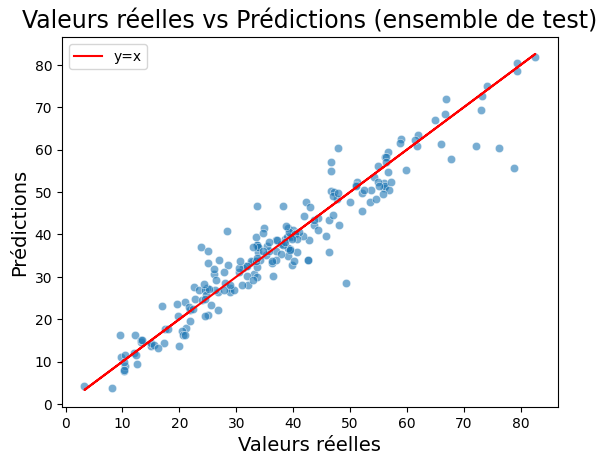

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Création du nuage de points

sns.scatterplot( x=Y_test, y=predictions_xgb, alpha=0.6)

# Tracé de la droite y = x pour comparer
plt.plot(predictions_df['Y_test'], predictions_df['Y_test'], color='red', label='y=x')

plt.xlabel('Valeurs réelles', fontsize=14)
plt.ylabel('Prédictions', fontsize=14)
plt.title('Valeurs réelles vs Prédictions (ensemble de test)', fontsize=17)
plt.legend()
plt.show()

# **ADABOOST**

In [24]:
# Création du modèle AdaBoostRegressor
ada_boost_regressor = AdaBoostRegressor()

# Paramètres à régler
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Recherche par grille pour trouver les meilleurs hyperparamètres
grid_search_ada = GridSearchCV(ada_boost_regressor, param_grid, cv=5)
grid_search_ada.fit(X_train_transformed, Y_train)

# Meilleurs hyperparamètres trouvés
best_params_ada = grid_search_ada.best_params_
print("Meilleurs hyperparamètres trouvés - AdaBoost :", best_params_ada)

# Utilisation du modèle avec les meilleurs hyperparamètres
best_ada_boost = AdaBoostRegressor(**best_params_ada)
best_ada_boost.fit(X_train_transformed, Y_train)
predictions_ada_boost = best_ada_boost.predict(X_test_transoformed)

# Évaluation du modèle AdaBoost
mae_ada = mean_absolute_error(Y_test, predictions_ada_boost)
mse_ada = mean_squared_error(Y_test, predictions_ada_boost)
rmse_ada = np.sqrt(mse_ada)
r2_ada = r2_score(Y_test, predictions_ada_boost)

print("Mean Absolute Error (MAE) - AdaBoost:", mae_ada)
print("Mean Squared Error (MSE) - AdaBoost:", mse_ada)
print("Root Mean Squared Error (RMSE) - AdaBoost:", rmse_ada)
print("R-squared (R²) - AdaBoost:", r2_ada)

Meilleurs hyperparamètres trouvés - AdaBoost : {'learning_rate': 0.1, 'n_estimators': 300}
Mean Absolute Error (MAE) - AdaBoost: 6.699867548210256
Mean Squared Error (MSE) - AdaBoost: 67.49252640406769
Root Mean Squared Error (RMSE) - AdaBoost: 8.215383521422947
R-squared (R²) - AdaBoost: 0.7411066686321659


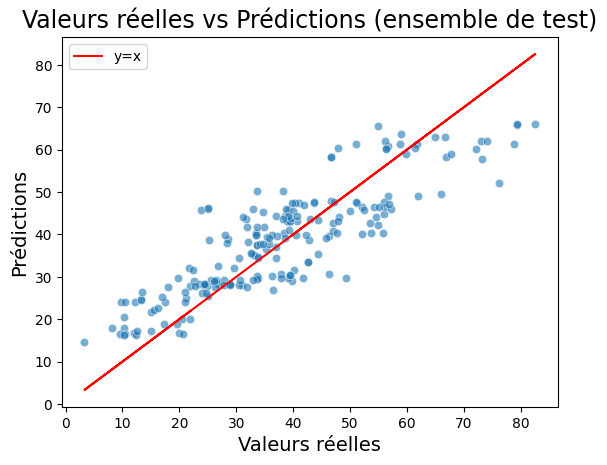

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Création du nuage de points

sns.scatterplot( x=Y_test, y=predictions_ada_boost, alpha=0.6)

# Tracé de la droite y = x pour comparer
plt.plot(predictions_df['Y_test'], predictions_df['Y_test'], color='red', label='y=x')

plt.xlabel('Valeurs réelles', fontsize=14)
plt.ylabel('Prédictions', fontsize=14)
plt.title('Valeurs réelles vs Prédictions (ensemble de test)', fontsize=17)
plt.legend()
plt.show()